In [87]:
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../X2_log2transform/Jeff-featab_rmTfh5_log2.csv")

In [88]:
df.shape

(311, 16)

In [89]:
df.columns

Index(['Unnamed: 0', 'II_SC_1_Tcells', 'II_SC_2_Tcells', 'II_SC_3_Tcells',
       'II_SC_4_Tcells', 'II_SC_6_Tfhcells', 'II_SC_7_Tfhcells',
       'II_SC_8_Tfhcells', 'II_SC_9_Th1cells', 'II_SC_10_Th1cells',
       'II_SC_11_Th1cells', 'II_SC_12_Th1cells', 'II_SC_13_Th17cells',
       'II_SC_14_Th17cells', 'II_SC_15_Th17cells', 'II_SC_16_Th17cells'],
      dtype='object')

In [90]:
df.index = df['Unnamed: 0']

# 3D plot
* annotated metabolites

In [91]:
df.shape

(311, 16)

In [92]:
#removing pool samples
new_df = df.loc[:,[x for x in df.columns if "pool" not in x and "Unnamed" not in x]]

In [93]:
df2 = np.transpose(new_df)

X_reduced = PCA(n_components=3).fit_transform(df2)

df2.index

Index(['II_SC_1_Tcells', 'II_SC_2_Tcells', 'II_SC_3_Tcells', 'II_SC_4_Tcells',
       'II_SC_6_Tfhcells', 'II_SC_7_Tfhcells', 'II_SC_8_Tfhcells',
       'II_SC_9_Th1cells', 'II_SC_10_Th1cells', 'II_SC_11_Th1cells',
       'II_SC_12_Th1cells', 'II_SC_13_Th17cells', 'II_SC_14_Th17cells',
       'II_SC_15_Th17cells', 'II_SC_16_Th17cells'],
      dtype='object')

In [94]:
decomposition_df = pd.DataFrame(X_reduced,index=df2.index,columns = ['PC1','PC2','PC3'])

decomposition_df.to_csv("3D_decomposition.csv")

In [95]:
X = PCA(n_components=3).fit(df2)
X.explained_variance_ratio_

array([0.61423279, 0.13111819, 0.0780533 ])

In [96]:
#The amount of variance that each PC explains
var= X.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(X.explained_variance_ratio_, decimals=4)*100)

print(var1)

[61.42 74.53 82.34]


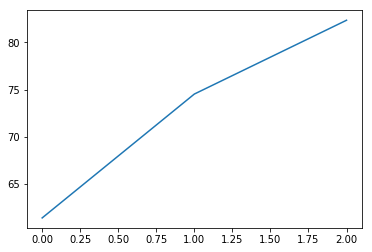

In [97]:
plt.plot(var1)

In [98]:
# Experiment E1 v.s. E2

colorseq = []
for item in df2.index:
    if "Tcells" in item:
        colorseq.append("#000000")
    elif "Tfhcells" in item:
        colorseq.append("#0000FF")
    elif "Th1cells" in item:
        colorseq.append("#FF0000")
    elif "Th17cells" in item:
        colorseq.append("#008000")

In [99]:
df2.index

Index(['II_SC_1_Tcells', 'II_SC_2_Tcells', 'II_SC_3_Tcells', 'II_SC_4_Tcells',
       'II_SC_6_Tfhcells', 'II_SC_7_Tfhcells', 'II_SC_8_Tfhcells',
       'II_SC_9_Th1cells', 'II_SC_10_Th1cells', 'II_SC_11_Th1cells',
       'II_SC_12_Th1cells', 'II_SC_13_Th17cells', 'II_SC_14_Th17cells',
       'II_SC_15_Th17cells', 'II_SC_16_Th17cells'],
      dtype='object')

In [100]:
X_reduced[:, 0]

array([-16.67960325, -14.50224554, -11.98261252, -12.16314679,
       -12.98907311, -15.03657049,  -8.25284748,  -2.69400339,
         0.80730199,  -1.10962837,  -2.32700439,  25.9531743 ,
        25.90566183,  17.87553653,  27.1950607 ])

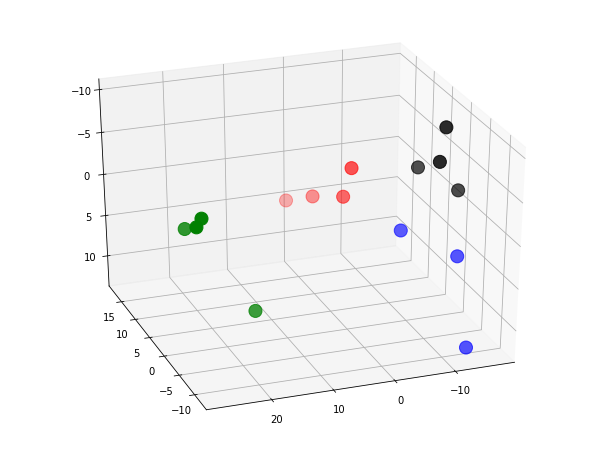

In [101]:
fig = pl.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=colorseq, s=170)
#ax.set_title("3D_PCA_4grps_metabolomics_2016Immunity")
#ax.set_xlabel("PC1(" + "{0:.2f}%".format(var[0]*100) + ")" )
#ax.set_ylabel("PC2(" + "{0:.2f}%".format(var[1]*100) + ")" )
#ax.set_zlabel("PC3(" + "{0:.2f}%".format(var[2]*100) + ")" )

pl.show()
fig.savefig("3D_PCA_4grps_metabolomics_2016Immunity" + ".pdf", bbox_inches='tight')

--------

# 2D plot
* annotated metabolites

In [102]:
df = pd.read_csv("../X2_log2transform/Jeff-featab_rmTfh5_log2.csv")

In [103]:
#removing pool samples
new_df = df.loc[:,[x for x in df.columns if "pool" not in x and "Unnamed" not in x]]

df2 = np.transpose(new_df)

X_reduced = PCA(n_components=2).fit_transform(df2) #

In [104]:
decomposition_df = pd.DataFrame(X_reduced,index=df2.index,columns = ['PC1','PC2'])

decomposition_df.to_csv("2D_decomposition.csv")

In [105]:
df2.index

X = PCA(n_components=2).fit(df2) #
X.explained_variance_ratio_

#The amount of variance that each PC explains
var= X.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(X.explained_variance_ratio_, decimals=4)*100)

print(var1)

[61.42 74.53]


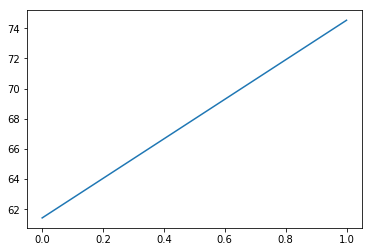

In [106]:
plt.plot(var1)

# Experiment E1 v.s. E2
colorseq = []
for item in df2.index:
    if "Tcells" in item:
        colorseq.append("#000000")
    elif "Tfhcells" in item:
        colorseq.append("#0000FF")
    elif "Th1cells" in item:
        colorseq.append("#FF0000")
    elif "Th17cells" in item:
        colorseq.append("#008000")

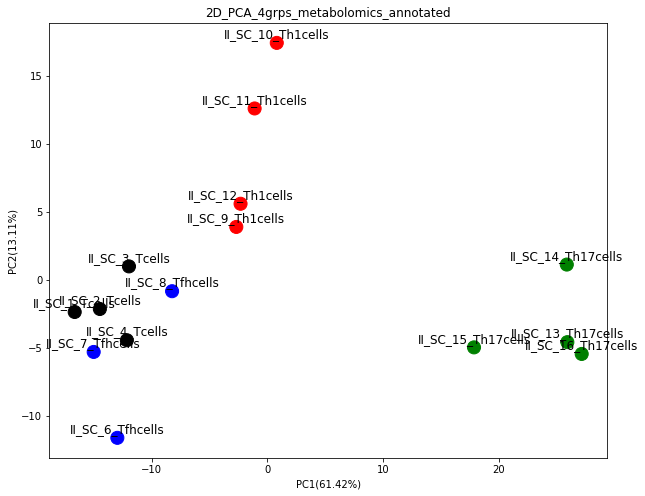

In [107]:
fig = pl.figure(2, figsize=(10, 8))

plt.scatter( X_reduced[:, 0], X_reduced[:, 1], c=colorseq, s=170) #

plt.title("2D_PCA_4grps_metabolomics_annotated")
plt.xlabel("PC1(" + "{0:.2f}%".format(var[0]*100) + ")" ) #
plt.ylabel("PC2(" + "{0:.2f}%".format(var[1]*100) + ")" ) #

i=0
for x,y in zip(X_reduced[:, 0],X_reduced[:, 1]):

    label = df2.index[i]

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 size=12)
    i +=1
    
pl.show()

fig.savefig("2D_PCA_4grps_metabolomics_annotated_wt_texts" + ".pdf", bbox_inches='tight') #

------------

# PC2 and PC3

In [108]:
#removing pool samples
new_df = df.loc[:,[x for x in df.columns if "pool" not in x and "Unnamed" not in x]]

df2 = np.transpose(new_df)

X_reduced = PCA(n_components=3).fit_transform(df2) #

In [109]:
df2.index

X = PCA(n_components=3).fit(df2) #
X.explained_variance_ratio_

#The amount of variance that each PC explains
var= X.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(X.explained_variance_ratio_, decimals=4)*100)

print(var1)

[61.42 74.53 82.34]


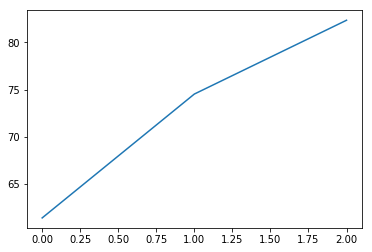

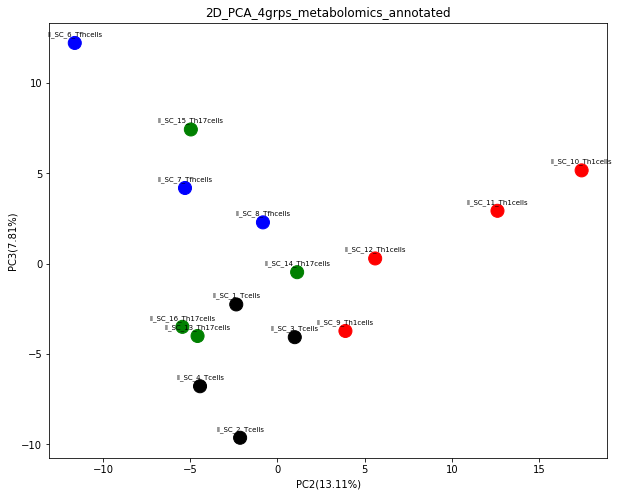

In [110]:
plt.plot(var1)

# Experiment E1 v.s. E2

colorseq = []
for item in df2.index:
    if "Tcells" in item:
        colorseq.append("#000000")
    elif "Tfhcells" in item:
        colorseq.append("#0000FF")
    elif "Th1cells" in item:
        colorseq.append("#FF0000")
    elif "Th17cells" in item:
        colorseq.append("#008000")


fig = pl.figure(2, figsize=(10, 8))

plt.scatter( X_reduced[:, 1], X_reduced[:, 2], c=colorseq, s=170) #

plt.title("2D_PCA_4grps_metabolomics_annotated")
plt.xlabel("PC2(" + "{0:.2f}%".format(var[1]*100) + ")" ) #
plt.ylabel("PC3(" + "{0:.2f}%".format(var[2]*100) + ")" ) #

i=0
for x,y in zip(X_reduced[:, 1],X_reduced[:, 2]):

    label = df2.index[i]

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 size=7)
    i +=1
    
pl.show()

fig.savefig("2D_PCA_4grps_metabolomics_annotated_wt_texts_PC2_PC3" + ".pdf", bbox_inches='tight') #